## **概率论基础**

---
---
---

### 概率论基础基于Python的实现

---
---
#### 概率与频率

##### 抛硬币试验

In [5]:
import random

def coin_trail():   #模拟抛10次硬币
    heads=0
    for i in range(10):
        if random.random()<=0.5:
            heads+= 1
    return heads

def simulate(n):
    trails= []
    for i in range(n):
        trails.append(coin_trail())
    return (sum(trails)/n)

print_list= [print("抛{}次硬币中正面朝上的次数：{}".format((10**i), simulate(pow(10, i)))) for i in range(5)]

抛1次硬币中正面朝上的次数：6.0
抛10次硬币中正面朝上的次数：5.0
抛100次硬币中正面朝上的次数：4.98
抛1000次硬币中正面朝上的次数：4.985
抛10000次硬币中正面朝上的次数：4.9891


---
---
#### 古典概型

事件A发生的概率$$P(A)=\frac{k}{n} $$  
$k$：事件A中包含的基本事件$\omega$的个数  
$n$：样本空间中包含的基本事件$\omega$的个数

---
---
#### 条件概率

设A，B为随机事件，且$P(A)>0$
$$P(B\mid A)=\frac{P(AB)}{P(A)}=\frac{n(AB)}{n(A)} $$
$$P(AB)=\frac{n(AB)}{n(\Omega)}$$  
$\Omega$：全样本空间

---
ex 7.5  
3张奖券中只有1张能中奖，现分别由3名同学无放回地抽取，最后一名同学抽到中奖券地概率是多少？如果已经知道第一个同学没抽中，那最后一名抽中地概率会变吗？

In [6]:
paper= 3
prize= 1
no_prize= paper - prize

#1
p1= prize / paper
print("最后一名同学中奖的概率是：{}".format(p1))

#2
p2= prize / ((no_prize-1) + prize)
print("第一名同学没中，最后一名同学中奖的概率是：{}".format(p2))

最后一名同学中奖的概率是：0.3333333333333333
第一名同学没中，最后一名同学中奖的概率是：0.5


---
ex 7.6 
甲乙两地都位于长江下游，根据一百多年的气象记录可知甲乙两地一年中雨天所占的比例分别为$ 20\% $和$ 18\% $，两地同时下雨的比例为$ 12\% $，计算如下概率。
1. 乙地为雨天时，甲地为雨天的概率是多少？
2. 甲地为雨天时，乙地为雨天的概率是多少？

In [7]:
pA= 0.2
pB= 0.18
pAB= 0.12

#1
p1= pAB / pB
print("乙地为雨天时，甲地为雨天的概率是：{}".format(p1))

#2
p2= pAB / pA
print("甲地为雨天时，乙地为雨天的概率是：{}".format(p2))

乙地为雨天时，甲地为雨天的概率是：0.6666666666666666
甲地为雨天时，乙地为雨天的概率是：0.6


---
ex 7.7  
某厂生产的产品能直接出厂的概率为$ 70\% $，余下$ 30\% $的产品要调试后再定。已知调试后有$ 80\% $的产品可以出厂，$ 20\% $的产品要报废，求该厂产品的报废率。

In [8]:
pT= 0.7     #产品可以直接出厂的概率
pF= 1 - pT  #产品需要调试的概率
pF_F= 0.2   #调试的产品中报废的概率
pF_T= 0     #直接出厂的产品中报废的概率

p=(pT * pF_T) + (pF * pF_F)
print("该厂产品的报废率为：{:.4f}".format(p))

该厂产品的报废率为：0.0600


---
---
#### 独立性

设A，B是试验E的两个随机事件，如果事件A,B相互独立
$$P(B\mid A)=P(B)$$  
即条件概率与无条件概率相等  
所以事件A,B满足
$$P(AB)=P(A) \cdot P(B)$$

多事件独立情况：  
$$n个事件相互独立 \Longrightarrow n个事件两两独立$$


---
ex 7.9  
甲、乙两人同时向一目标射击，甲击中率为$80\%$，乙击中率为$70\%$，求目标被击中的概率。

In [9]:
pA= 0.8
pB= 0.7
pAB= pA * pB
p= pA + pB - pAB
print("目标被击中的概率是：{}".format(p))

目标被击中的概率是：0.9400000000000001


---
##### 独立试验

伯努利试验：一个只产生两个结果$A和\bar{A} $的随机试验$E$  
$ n $重伯努利试验（或称伯努利概型）：将$ E $重复进行$ n $次  
伯努利概型计算公式：  
$$P_{n}(X=k)=C_{n}^{k}\cdot p^{k}\cdot (1-p)^{n-k}$$
$k=0,1,2,\cdots ,n$

Scipy库  
1. 求排列：`scipy.special.perm(N, k, exact=False)`  

|参数`exact`|float|long int|
|:---:|:---:|:---:|
|bool|**False**|True|
2. 求组合：`scipy.special.comb(N, k, exact=False, repetition=False, legacy=True)`  
参数暂时用默认的

ex 7.10  
将一枚均匀的骰子连续抛掷3次，求6点出现的次数及相应的概率。

In [10]:
import numpy as np
from scipy.special import comb

n=3
p= 1 / 6
p_k=0

for k in range(4):
    p_k= comb(n, k) * p**k * (1-p)**(n-k)
    print("出现{}次6点的概率为：{:.5f}".format(k, p_k))

出现0次6点的概率为：0.57870
出现1次6点的概率为：0.34722
出现2次6点的概率为：0.06944
出现3次6点的概率为：0.00463


ex 7.11  
考虑一个抛硬币的例子，求抛出了49个正面，31个反面的概率是多少？

In [11]:
from scipy.special import comb

k=49
n= k + 31
p= 1 / 2

p_k= comb(n, k) * p**k * (1-p)**(n-k)
print("抛出了49个正面，31个反面的概率是：{:.5f}".format(p_k))

抛出了49个正面，31个反面的概率是：0.01184


---
---
#### 随机变量

##### 离散型随机变量

1. 设离散型随机变量$X$的所有取值为$x_{k}$，$k=1,2,\cdots$，  
记$P\left \{ X=x_{k} \right \} = p_{k} $，$k=1,2,\cdots$  
2. 离散型随机变量$X$的分布律(**PMF**)  

|$X$的取值|$x_1$|$x_2$|$\cdots$|$x_n$|$\cdots$|
|:---:|:---:|:---:|:---:|:---:|:---:|
|对应概率$p_k$|$p_1$|$p_2$|$\cdots$|$p_n$|$\cdots$|

ex 7.12  
运送给零售商的20台笔记本电脑中有3台次品，若某学校随机购买了这批电脑中的1台，求学校买到次品的概率函数？

In [12]:
from scipy.special import comb

num_pc= 20
bad_pc= 3
demand= 1

p=[]
print("X的取值\t概率")
for k in range(demand+1):
    p_k=(comb(bad_pc, k) * comb(num_pc-bad_pc, demand-k)) / comb(num_pc, demand)
    p.append(p_k)
    print("X={}\t{}".format(k, p[k]))

X的取值	概率
X=0	0.85
X=1	0.15


ex 7.13  
若某公司生产的某个产品中奖率是$50\%$,求购买4个同样的产品中奖的概率函数和概率分布函数。

In [13]:
from scipy.special import comb

n= 4
p= 0.5

F= []
p_k= []
sum=0
print("X的取值\t概率p\t概率分布函数F(X)")
for k in range(n+1):
    p_k.append(comb(n, k) * p**k * (1-p)**(n-k))
    sum+= p_k[k]
    F.append(sum)
    print("{}\t{}\t{}".format(k, p_k[k], F[k]))

X的取值	概率p	概率分布函数F(X)
0	0.0625	0.0625
1	0.25	0.3125
2	0.375	0.6875
3	0.25	0.9375
4	0.0625	1.0


概率分布函数为
$$F(x)=\left\{\begin{matrix}
 0 & ,x<0\\
 0.0625 & ,0\le x<1\\
 0.3125 & ,1\le x<2\\
 0.6875 & ,2\le x<3\\
 0.9375 & ,3\le x<4\\
 1 & ,x\ge 4\\
\end{matrix}\right.$$

ex 7.14  
在python中画出ex 7.13的概率函数以及分布函数图

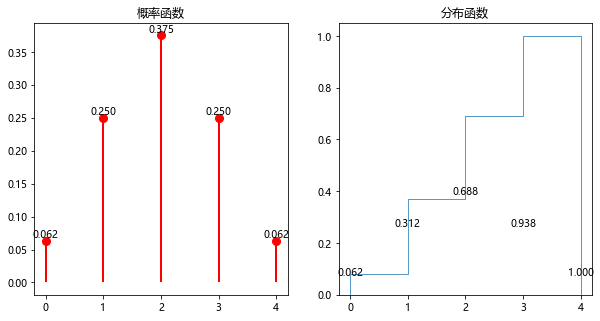

In [14]:
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

plt.rcParams["font.sans-serif"]= ['Microsoft YaHei'] #更改字体为 微软雅黑
plt.rcParams['axes.unicode_minus']= False   #设置正常显示字符

def Discrete_pmf(n, p_k):
    xk= np.arange(n+1)    #等差数列，用np.linspace()效果不好，参数多
    pk= tuple(p_k)  #概率元组
    #用 rv_discrete类自定义离散概率分布 rvs
    dist= stats.rv_discrete(name='custm', values=(xk, pk))

    #调用 其rvs方法，获得符合概率的100个随机数
    rv= dist.rvs(size= 100)
    fig, (ax0, ax1)= plt.subplots(ncols= 2, figsize= (10, 5))

    #显示概率函数
    ax0.set_title("概率函数")
    ax0.plot(xk, pk, 'ro', ms=8, mec='r')
    ax0.vlines(xk, 0, pk, colors='r', linestyles='-', lw=2)
    for i in xk:
        ax0.text(i, pk[i], '%.3f'%pk[i], ha='center', va='bottom')

    #显示分布函数
    ax1.set_title("分布函数")
    pk1= dist.cdf(xk)

    #利用直方图显示分布函数
    ax1.hist(rv, 4, density=1, histtype='step', facecolor='blue'\
        , alpha=0.75, cumulative=True, rwidth=0.9)
    for i in xk:
        ax1.text(i, pk[i], '%.3f'%pk1[i], ha='center', va='bottom')
    
Discrete_pmf(n, p_k)


---
##### 连续型随机变量

1. 概率密度函数(**PDF**)：设$X$为连续型随机变量，$X$在任意区间$(a,b)$上的概率:
$$P(a<X\le b)=\int_{a}^{b} f(x)\mathrm{d}x$$
2. 累积分布函数(**CDF**)$F(x)$：
$$F(x)=\int_{-\infty}^{x} f(t)\mathrm{d}t $$
3. 对于任意常数$a<b$，有：
$$P(a<X\le b)= F(b)-F(a) =\int_{a}^{b} f(x)\mathrm{d}x$$

ex 7.15  
假设某零件误差量在区间$(-4,4)$均匀分布，计算误差量为$1\sim3$的概率。

In [15]:
import sympy
import numpy as np 
from scipy.integrate import quad

x,C= sympy.symbols("x,C")
def f(x):
    if -4 < x < 4:
        return 1    #此处将未知常量C提到外面，否则下面无法求积分
    else:
        return 0
P= quad(f, -4, 4)   #返回一个元组，第一个元素是计算结果，第二个元素是误差
C= 1 / P[0]

#概率密度函数
def f(x):
    if -4 < x < 4:
        return C
    else:
        return 0

F1_3= quad(f, 1, 3)
print("误差量为1~3的概率是：{}".format(F1_3[0]))

误差量为1~3的概率是：0.25


In [16]:
#绘图
# 待补充

ex 7.16  
在Python中输出正态分布概率密度函数$f(x)$和对应的概率分布函数$F(x)$。

随机变量$X$满足正态分布：$X \sim N(\mu, \sigma^{2})$
概率密度函数：$$f(x)=\frac{1}{\sqrt[]{2\pi }\sigma }\cdot e^{-\frac{(x-\mu)^2}{2\sigma^2} }  $$
其中$-\infty < x < \infty$

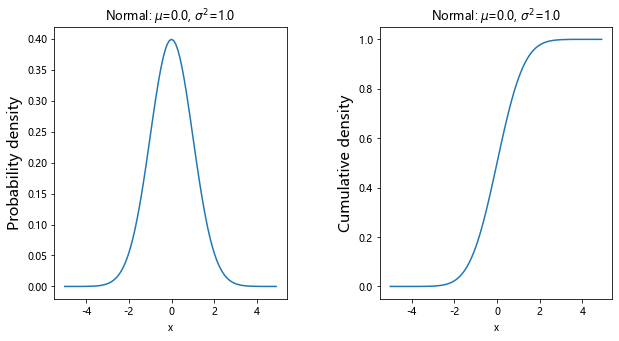

In [17]:
#书本代码
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def test_norm_pmf(mu=0, sigma=1):   #平均值mu  标准差sigma
    # 正态分布是一种连续分布，其函数可以在实线上的任何地方取值
    x= np.arange(-5, 5, 0.1)    #生成随机数

    #得到对应的概率值
    y= (1/ (sympy.sqrt(2*sympy.pi) * sigma)) * pow(sympy.E, (-1* (x-mu)**2 / (2*sigma**2)))
    
    fig, (ax0, ax1)= plt.subplots(ncols=2, figsize=(10,5))
    ax0.plot(x, y)
    ax1.plot(x, stats.norm.cdf(x, 0, 1))
    
    #概率密度函数
    ax0.set_title('Normal: $\mu$=%.1f, $\sigma^2$=%.1f'% (mu, sigma))
    ax0.set_xlabel('x')
    ax0.set_ylabel('Probability density', fontsize=15)

    #分布函数
    ax1.set_title('Normal: $\mu$=%.1f, $\sigma^2$=%.1f'% (mu, sigma))
    ax1.set_xlabel('x')
    ax1.set_ylabel('Cumulative density', fontsize=15)

    fig.subplots_adjust(wspace=0.4)
    plt.show()

test_norm_pmf()

---
---
#### 二维随机变量

##### 二维离散型随机变量

ex 7.17  
设同一个品种的5个产品中，有3个次品，每次从中取一个检验，连续两次，设$X$表示第1次取到的次品概率，$Y$是第2次取到的次品概率，每次取出不放回，求出$(X,Y)$的联合概率函数分布。

In [18]:
# 记1为取到次品，0为没有取到次品
# 所有情况：(0, 0), (0, 1), (1, 0), (1, 1)

n=1
num= 5
bad_num= 3
good_num= num- bad_num
p_00= good_num/num * (good_num-1)/(num-1)
p_01= good_num/num * (bad_num)/(num-1)
p_10= bad_num/num * good_num/(num-1)
p_11= bad_num/num * (bad_num-1)/(num-1)
print("P(X=0, Y=0)={:.3f}".format(p_00))
print("P(X=0, Y=1)={:.3f}".format(p_01))
print("P(X=1, Y=0)={:.3f}".format(p_10))
print("P(X=1, Y=1)={:.3f}".format(p_11))

#有待优化

P(X=0, Y=0)=0.100
P(X=0, Y=1)=0.300
P(X=1, Y=0)=0.300
P(X=1, Y=1)=0.300


---
##### 二维连续型随机变量

二维随机变量$(X,Y)$的分布函数$F(x,y)$和概率密度函数$f(x,y)$的关系
$$F(x,y)=\int_{-\infty}^{y} \int_{-\infty}^{x} f(u,v)\mathrm{d}u \mathrm{d}v$$  

设$G$是平面上的一个区域，点$(x,y)$落在$G$内的概率为
$$P\left \{ (X,Y)\in G \right \} =\iint\limits_{G} f(x,y)\mathrm{d}x \mathrm{d}y$$  
若$f(x,y)$在点$(x,y)$上连续，则有
$$\frac{\partial^{2}F(x,y)}{\partial x \cdot \partial y} = f(x,y)$$

设二维随机变量$(X,Y)$具有概率密度：
$$f(x,y)=\left\{\begin{matrix}
 ke^{-(2x+3y)} ,& x>0,y>0\\
 0 ,& else
\end{matrix}\right.$$  
1. 求常数$k$
2. 求分布函数$F(x,y)$
3. 求$P(Y \le X)$的概率

In [19]:
import numpy as np
import sympy
from sympy import *
from scipy.integrate import dblquad
import math

#1
def f(x, y):
    return pow(sympy.E, -1*(2*x+3*y))

F= dblquad(f, 0, oo, lambda x:0, lambda x:oo)
k= 1 / F[0]
print("常数k：{:.4f}".format(k))

# 概率密度函数
def f(x, y):
    if x>0 and y>0:
        return k * pow(sympy.E, -1*(2*x+3*y))
    else:
        return 0

#2
x,y = sympy.symbols('x,y', real=True)
#F= dblquad(f, -oo, x, lambda x:-oo, lambda x:y)
F, err= dblquad(f, y, oo, lambda x:0, lambda x:oo)

# 带未知参数的积分怎么弄?

常数k：6.0000


TypeError: Cannot convert expression to float

---
---
#### 边缘分布

对于二维连续型随机变量$(X,Y)$，联合概率密度和分布函数分别为$f(x,y)$和$F(x,y)$，  
则关于$X$的边缘分布函数为
$$F_{X}(x)=P\left \{ X \le x \right \} = F(x,+\infty) 
= \int_{-\infty}^{x} \left [ \int_{-\infty}^{+\infty} f(x,y) \mathrm{d}y \right ]  \mathrm{d}x $$
关于$X$的边缘密度函数为
$$f_{X}(x) = \int_{-\infty}^{+\infty} f(x,y) \mathrm{d}y$$  
关于$Y$的则将$x$和$y$全部对调即可。

ex 7.19  
对某一群体的吸烟及健康状况进行调查，引入随机变量$X$和$Y$。
$$X=\left\{\begin{matrix}
 0 ,& 健康\\
 1 ,& 一般\\
 2 ,& 不健康
\end{matrix}\right.$$
$$Y=\left\{\begin{matrix}
 0 ,& 不吸烟\\
 10 ,& 一天吸烟不多于15支\\
 20 ,& 一天吸烟多于15支
\end{matrix}\right.$$  
根据调查结果，得$(X,Y)$的联合概率分布如下表：
|$(X,Y)$的联合概率|0|10|20|
|:---:|:---:|:---:|:---:|
|0|0.35|0.04|0.025|
|1|0.025|0.15|0.04|
|2|0.020|0.10|0.25|

1. 求关于$X$和$Y$的边缘概率分布
2. 求$P(X=2 \mid Y=20)$的值

In [36]:
import numpy as np

P= np.matrix([[0.35, 0.04, 0.025], [0.025, 0.15, 0.04], [0.02, 0.1, 0.25]])

#1
#关于X的边缘概率分布
sum_x= P.sum(axis=1)
print("X的边缘概率：\nX\tP")
for x in range(len(sum_x)):
    print("{}\t{}".format(x, float(sum_x[x])))


#关于Y的边缘概率分布
sum_y= P.sum(axis=0)
print(len(sum_y))
print("Y的边缘概率：\nY\tP")
for y in range(len(sum_y.T)):
    print("{}\t{:.3f}".format(y, float(sum_y.T[y])))

#2
p2_20= P[2,2] / sum_y.T[2]
print("P(X=2 | Y=20)={:.3f}".format(float(p2_20)))

X的边缘概率：
X	P
0	0.415
1	0.215
2	0.37
1
Y的边缘概率：
Y	P
0	0.395
1	0.290
2	0.315
P(X=2 | Y=20)=0.794


ex 7.20  
设二维随机变量$(X,Y)$在区域$G=\left \{ (x,y) \mid  0 \le x \le 1, x^2 \le y \le x \right \} $上服从均匀分布，求边缘概率密度$f_{x}(x)$和$f_{y}(y)$。

---
---
#### **Scipy.stats**相关函数

该模块有多种概率分布，每种分布有以下几种常用的统计函数：  

|函数名|解释(相关参数看各自分布的要求)|
|:---:|:---:|
|`rvs`|产生服从指定分布的随机数|
|`pdf`|概率密度函数|
|`cdf`|分布函数|
|`ppf`|百分点函数，即分布函数的反函数|
|`Sf`|残差函数|
|`stats`|返回期望与方差|

常用分布：

|分布|名称|
|:---:|:---:|
|`norm`|正态分布|
|`binom`|二项分布|
|`poisson`|泊松分布|
|`uniform`|均匀分布|
|`chi2`|卡方分布|
|`beta`|Beta分布|

ex 7.23  
获取`norm`函数的使用说明

In [10]:
from scipy import stats
from scipy.stats import norm
print(norm.__doc__)

A normal continuous random variable.

    The location (``loc``) keyword specifies the mean.
    The scale (``scale``) keyword specifies the standard deviation.

    As an instance of the `rv_continuous` class, `norm` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, loc=0, scale=1)
        Probability density function.
    logpdf(x, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, loc=0, scale=1)
        Log of the cumulative distribution function.
    sf(x, loc=0, scale=1)
        Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
    logsf(x, loc=0, scale=1)
        Log of the survival function.
    ppf(q, loc=0, scale

ex 7.24  
创建正态分布随机变量及绘图

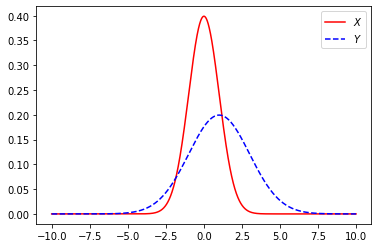

In [11]:
from scipy import stats
from scipy.stats import norm
import numpy as np
import pylab as plt

X= norm()   #默认mu=0, sigma=1
Y= norm(loc= 1.0, scale= 2.0)
t= np.arange(-10, 10, 0.01)

plt.plot(t, X.pdf(t), label="$X$", color="red")
plt.plot(t, Y.pdf(t), 'b--', label='$Y$')
plt.legend()
plt.show()

---
---
---
### 应用

ex 7.21  
在50个人当中出现与自己同一天过生日的人的概率有多大？

In [1]:
#书本原代码
from random import *
counter, times= 0, int(1e4)
for i in range(times):
    if len({randint(1, 365) for i in range(50)}) != 50:
        counter+= 1
print("在50个人中有相同生日的概率是:{}".format(counter/times))

在50个人中有相同生日的概率是:0.9699


ex 7.22  
考虑一个抛硬币的例子，一个盒子里装了3个硬币，这3个硬币抛出正面的概率分别为$0.3$、$0.5$、$0.7$。假设从盒子中随机取出一个硬币，抛出了49个正面，31个反面，那么抛哪个硬币的可能性比较大？

In [8]:
from scipy.special import  comb

h= 49   #正面
t= 31   #反面
n= h+t  #总试验次数
p0= h / (h+t)   #命中率
p= [0.3, 0.5, 0.7]

def bernoulli(p, n, h):
    max_prob= 0
    for k in range(len(p)):
        p_h= comb(n, h) * p[k]**h * (1-p[k])**(n-h)
        if p_h > max_prob:
            max_prob= p_h
            max_k= k
    return max_k, max_prob

k,prob= bernoulli(p, n, h)
print("选中第{}个硬币的概率最大：{:.3f}".format(k+1, prob))

选中第3个硬币的概率最大：0.023


---
---
---
### 课后习题

#### 1. 已知某路口发生事故的概率是每天2次，用Python编程求出此处一天内发生0、1、2、3、4次事故的概率是多少？

泊松分布：描述已知一段时间内事件发生的平均数，求某个时间内事件发生的概率
$$P(X=r)=\frac{e^{-\lambda \cdot}\cdot \lambda^{r}}{r!} $$  
其中，$r$表示给定区间内发生事件的次数  
$\lambda$表示每个区间的平均发生次数

In [13]:
from scipy.stats import poisson
import sympy
import numpy as np

mu= 2
X= poisson(mu)
x=[0, 1, 2, 3, 4]
for i in x:
    print("此处一天内发生{}次事故的概率是{:.3f}".format(i, X.pmf(i)))

此处一天内发生0次事故的概率是0.135
此处一天内发生1次事故的概率是0.271
此处一天内发生2次事故的概率是0.271
此处一天内发生3次事故的概率是0.180
此处一天内发生4次事故的概率是0.090


#### 2. 假设某地区位于甲、乙两河流交处，当任一河流泛滥时，该地区即遭受水灾。设某时期内甲河流泛滥的概率是$0.1$，乙河流泛滥的概率是$0.2$，当甲河流泛滥时，乙河流泛滥的概率是$0.3$，求：
- 该时期内这个地区遭受水灾的概率。
- 当乙河流泛滥时，甲河流泛滥的概率。

In [17]:


pA= 0.1
pB= 0.2
pB_A= 0.3

#1
# 求不遭受水灾的概率
p_no= (1-pA) * (1-pB)
p1= 1 - p_no
print("该时期内这个地区遭受水灾的概率为：{:.3f}".format(p1))

#2
# 求P(A|B)= P(AB) / P(B)
# 已知P(B|A)= P(AB) / P(A)
pAB= pB_A * pA
pA_B= pAB / pB
print("当乙河流泛滥时，甲河流泛滥的概率为：{}".format(pA_B))

该时期内这个地区遭受水灾的概率为：0.280
当乙河流泛滥时，甲河流泛滥的概率为：0.15


#### 3. 设连续型随机变量的PDF为  
$$f(x)=\left\{\begin{matrix}
 kx, & 0<x<1\\
 0, & else
\end{matrix}\right.$$  
- 求常数$k$的值  
- 求$X$的CDF $F(x)$  
- 计算$P(-0.5<X<0.5)$

In [61]:
import numpy as np
import sympy
import scipy 
from  scipy.integrate import quad
from sympy import *

#1
k= 1 / (quad(lambda x:x, 0, 1))[0]
print("常数k的值为{}".format(k))

#2
def pdf(x):
    if 0<x<1:
        return k*x
    else:
        return 0

def cdf(x):
    F, err= quad(pdf, -oo, x)
    return F

print("P(-0.5<X<0.5)={:.3f}".format(cdf(0.5)-cdf(-0.5)))

常数k的值为2.0
P(-0.5<X<0.5)=0.250
